# Q Learning

In [66]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from tqdm import tqdm

## Libraries and Parameters for Video Recording

In [67]:
import os
from gymnasium.wrappers import RecordVideo, RecordEpisodeStatistics

## Environment: Frozen Lake

- **Environment**: FrozenLake
- **map**: 8x8
- **is_slippery**: True/False. If True will move in intended direction with probability of 1/3 else will move in either perpendicular direction with equal probability of 1/3 in both directions.

In [68]:
# Parameter for Video
training_period = 2500  # Record every 2500 episodes

env = gym.make('FrozenLake-v1',map_name='8x8',is_slippery=True,render_mode="rgb_array")

# Create Environment with Video Recording
env = RecordVideo(env, video_folder="../videos/Frozen_Lake/",
                  name_prefix="training",
                  episode_trigger=lambda x: x % training_period == 0)
env = RecordEpisodeStatistics(env)

## Parameters

In [ ]:
n_episode = 10000
alpha = 0.5
epsilon = 0.1
decay = 0.0001

## Q_Table

Start with every Q(s,a) = 0

In [70]:
Q = np.zeros((env.observation_space.n,env.action_space.n))

## Q-Learning

In [71]:
Returns = []

for i in tqdm(range(n_episode)):

    # 0. Reset for every episode
    observation, info = env.reset()
    Return                                              = 0.
    episode_over                                        = False

    while not episode_over:

        # 1. Choose an action
        if np.random.rand() < epsilon:
            action                                      = env.action_space.sample() 
        else:
            max_index                                   = np.where(Q[observation] == np.max(Q[observation]))[0]
            action                                      = np.random.choice(max_index)

        # 2. take action and observe
        next_observation,reward,terminated,truncated,_  = env.step(action)          

        # 3. Update Rule
        Q[observation][action]                          = Q[observation][action] + alpha*(reward + max(Q[next_observation]) - Q[observation][action])

        # 4. Preparation for next iter
        Return                                          += reward               
        episode_over                                    = terminated or truncated   
        observation                                     = next_observation
        epsilon                                         *= decay

    # 5. Record return after episode termination
    Returns.append(Return)

env.close() # Ensure video is saved

  0%|          | 0/10000 [00:00<?, ?it/s]

MoviePy - Building video /Users/donggyulee/Desktop/Independent/Projects/DRL_Hugging_Face/videos/Frozen_Lake/training-episode-0.mp4.
MoviePy - Writing video /Users/donggyulee/Desktop/Independent/Projects/DRL_Hugging_Face/videos/Frozen_Lake/training-episode-0.mp4



  3%|▎         | 288/10000 [00:00<00:11, 861.66it/s]

MoviePy - Done !
MoviePy - video ready /Users/donggyulee/Desktop/Independent/Projects/DRL_Hugging_Face/videos/Frozen_Lake/training-episode-0.mp4


 24%|██▍       | 2382/10000 [00:01<00:05, 1423.94it/s]

MoviePy - Building video /Users/donggyulee/Desktop/Independent/Projects/DRL_Hugging_Face/videos/Frozen_Lake/training-episode-2500.mp4.
MoviePy - Writing video /Users/donggyulee/Desktop/Independent/Projects/DRL_Hugging_Face/videos/Frozen_Lake/training-episode-2500.mp4



 28%|██▊       | 2819/10000 [00:02<00:05, 1328.90it/s]

MoviePy - Done !
MoviePy - video ready /Users/donggyulee/Desktop/Independent/Projects/DRL_Hugging_Face/videos/Frozen_Lake/training-episode-2500.mp4


 50%|████▉     | 4992/10000 [00:03<00:03, 1447.22it/s]

MoviePy - Building video /Users/donggyulee/Desktop/Independent/Projects/DRL_Hugging_Face/videos/Frozen_Lake/training-episode-5000.mp4.
MoviePy - Writing video /Users/donggyulee/Desktop/Independent/Projects/DRL_Hugging_Face/videos/Frozen_Lake/training-episode-5000.mp4



 53%|█████▎    | 5262/10000 [00:04<00:04, 1144.94it/s]

MoviePy - Done !
MoviePy - video ready /Users/donggyulee/Desktop/Independent/Projects/DRL_Hugging_Face/videos/Frozen_Lake/training-episode-5000.mp4


 74%|███████▍  | 7427/10000 [00:05<00:01, 1414.14it/s]

MoviePy - Building video /Users/donggyulee/Desktop/Independent/Projects/DRL_Hugging_Face/videos/Frozen_Lake/training-episode-7500.mp4.
MoviePy - Writing video /Users/donggyulee/Desktop/Independent/Projects/DRL_Hugging_Face/videos/Frozen_Lake/training-episode-7500.mp4



 79%|███████▊  | 7872/10000 [00:05<00:01, 1348.15it/s]

MoviePy - Done !
MoviePy - video ready /Users/donggyulee/Desktop/Independent/Projects/DRL_Hugging_Face/videos/Frozen_Lake/training-episode-7500.mp4


100%|██████████| 10000/10000 [00:07<00:00, 1338.59it/s]


MoviePy - Building video /Users/donggyulee/Desktop/Independent/Projects/DRL_Hugging_Face/videos/Frozen_Lake/training-episode-10000.mp4.
MoviePy - Writing video /Users/donggyulee/Desktop/Independent/Projects/DRL_Hugging_Face/videos/Frozen_Lake/training-episode-10000.mp4



MoviePy - Done !
MoviePy - video ready /Users/donggyulee/Desktop/Independent/Projects/DRL_Hugging_Face/videos/Frozen_Lake/training-episode-10000.mp4


## Plot Return

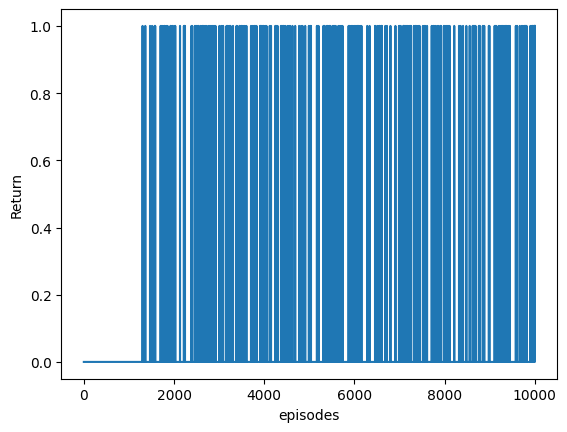

In [72]:
# Plot
plt.figure()
plt.plot(Returns)
plt.xlabel('episodes')
plt.ylabel('Return')
plt.show()